**Building a CNN for the Emotional Facial Recognization**

Upload the dataset

In [ ]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

Done


In [ ]:
!kaggle datasets download jonathanoheix/face-expression-recognition-dataset
!ls

 95% 115M/121M [00:01<00:00, 129MB/s] 
100% 121M/121M [00:01<00:00, 107MB/s]
face-expression-recognition-dataset.zip  sample_data


In [ ]:
!unzip -o face-expression-recognition-dataset.zip
!ls

# Convolutional Neural Networks- Emotion Facial Recognition

Convolutional Neural Networks (CNNs) are deep neural networks with the addition of two very special types of layers: convolutional layers and pooling layers. 

Import neccessary Libraries, Check Version of Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

print(tf.__version__)

2.8.2


Use OS library to Unzip and Display the Two tests sets in the data.

In [ ]:
import os
import zipfile

zipfile.ZipFile('face-expression-recognition-dataset.zip').extractall()
os.listdir('./images/images/')

['train', 'validation']

Assign and Set the Train and Validation to Variables, print out the 7 emotions within the data. 

In [ ]:
#Checking the details of the train and test data

train_dir = './images/images/train/'
train_categories = set(os.listdir(train_dir))
validation_dir = './images/images/validation/'
test_categories = set(os.listdir(validation_dir))

if train_categories.symmetric_difference(test_categories):
  print("Warning!: ", train_categories.symmetric_difference(test_categories))

print(sorted(train_categories))
print(len(train_categories))

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
7


Exploratory Data Anaylsis - Display every emotion. 

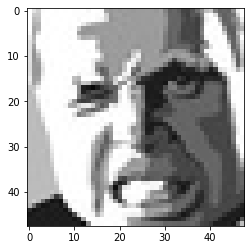

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

sample_dir = os.path.join(train_dir, 'angry')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
plt.imshow(img)

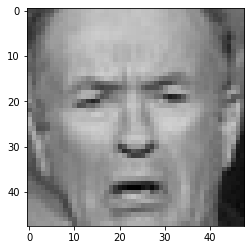

In [ ]:
sample_dir = os.path.join(train_dir, 'disgust')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
plt.imshow(img)

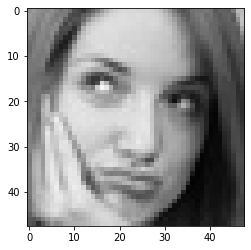

In [ ]:
sample_dir = os.path.join(train_dir, 'fear')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

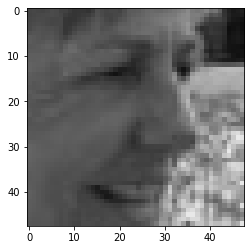

In [ ]:
sample_dir = os.path.join(train_dir, 'happy')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

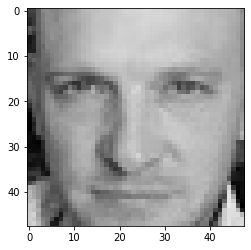

In [ ]:
sample_dir = os.path.join(train_dir, 'neutral')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

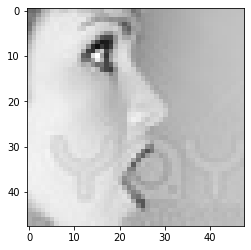

In [ ]:
sample_dir = os.path.join(train_dir, 'surprise')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

Using img to show the color encoding range:

In [ ]:
img.min(), img.max()

(16, 255)

Using the TensorFlow Keras it has a class called DirectoryIterator that can help with getting the images in the model.

In [ ]:
import tensorflow as tf

train_dir = './images/images/train/'

train_image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(100, 100),
    directory=train_dir,
    batch_size=128,
    image_data_generator=None)

Found 28821 images belonging to 7 classes.


Validate the images 

In [ ]:
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 0)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 1)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 2)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 3)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 4)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 5)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 6)[0][0]])

./images/images/train/angry/0.jpg
./images/images/train/disgust/10018.jpg
./images/images/train/fear/10010.jpg
./images/images/train/happy/100.jpg
./images/images/train/neutral/1000.jpg
./images/images/train/sad/10006.jpg
./images/images/train/surprise/10007.jpg


We input our images into a convolutional layer followed by a pooling layer. After stacking a few convolutional layers and pooling layers, we flatten the final pooling output and finish with some traditional dense layers. The final dense layer is 7 nodes wide and is activated by softmax. This layer represents our classification predictions.

In [ ]:
#MODEL 1
#preset CNN model 
#accuracy : 0.3589
#epochs : 10 
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu',
                           input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])



model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
"""

'\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Conv2D(16, 3, padding=\'same\', activation=\'relu\',\n                           input_shape=(100, 100, 1)),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Conv2D(32, 3, padding=\'same\', activation=\'relu\'),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Conv2D(64, 3, padding=\'same\', activation=\'relu\'),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(512, activation=\'relu\'),\n    tf.keras.layers.Dense(7, activation=\'softmax\')\n])\n\n\n\nmodel.compile(optimizer="Adam",\n              loss=\'categorical_crossentropy\',\n              metrics=[\'accuracy\'])\n\nmodel.summary()\n'

In [ ]:
#MODEL 2
#added a 2,2 to Max Pooling 2D layer 
#accuracy : .37
#epochs : 10 
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu',
                           input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])


model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
"""


'\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Conv2D(32, 3, activation=\'relu\',\n                           input_shape=(100, 100, 1)),\n    tf.keras.layers.MaxPooling2D((2,2)),\n    tf.keras.layers.Conv2D(32, 3, padding=\'same\', activation=\'relu\'),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Conv2D(64, 3, padding=\'same\', activation=\'relu\'),\n    tf.keras.layers.MaxPooling2D((2,2)),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(64, activation=\'relu\'),\n    tf.keras.layers.Dense(7, activation=\'softmax\')\n])\n\n\nmodel.compile(optimizer="Adam",\n              loss=\'categorical_crossentropy\',\n              metrics=[\'accuracy\'])\n\nmodel.summary()\n'

In [ ]:
#MODEL 3
#changed the activation function to tanh to train the data closer to zero in hopes to improve the accuracy. 
#accuracy: 0.2089
#epochs :10 
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation='tanh',
                           input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='tanh'),
    tf.keras.layers.Dense(7, activation='softmax')
])


model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
"""

'\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Conv2D(16, 3, activation=\'tanh\',\n                           input_shape=(100, 100, 1)),\n    tf.keras.layers.MaxPooling2D((2,2)),\n    tf.keras.layers.Conv2D(32, 3, padding=\'same\', activation=\'tanh\'),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Conv2D(64, 3, padding=\'same\', activation=\'tanh\'),\n    tf.keras.layers.MaxPooling2D((2,2)),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(512, activation=\'tanh\'),\n    tf.keras.layers.Dense(7, activation=\'softmax\')\n])\n\n\nmodel.compile(optimizer="Adam",\n              loss=\'categorical_crossentropy\',\n              metrics=[\'accuracy\'])\n\nmodel.summary()\n'

In [ ]:
#MODEL 4
#loss: 0.2560 - accuracy: 0.92
#epochs : 100
#removed the 2D pooling layer inputs, added more epochs to increase the accuracy, wanted to get closer to 90. But this was a huge increase in accuracy. 

 
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu',
                           input_shape=(50, 50, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='sigmoid')
    ])

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
#increased the epochs to 100 
#accuracy: .92

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 50, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)        

In [ ]:
#Model 5
"""
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu',
                           input_shape=(100, 100, 1)),
    tf.keras.layers.BatchNormalization(),                        
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),                        
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),                        
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),   
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),   
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(7, activation='softmax') #no. of classes
    ])

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
"""

In [ ]:
"""
#for model 5 
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0.00005,
    patience=3,
    verbose=1,
    restore_best_weights=True,
 

)


reduce_learningrate = ReduceLROnPlateau(monitor='loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

model5.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model5.fit(train_set,
    steps_per_epoch = 100,
    epochs=100, 
    callbacks=[early_stopping,reduce_learningrate])
"""

Split the Data into Training and Validation, then add hyperparameters, to fit this model using Image Data Generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/images/'
datagen_train  = ImageDataGenerator()
data_val =ImageDataGenerator()


train_set = datagen_train.flow_from_directory(train_dir+"train",
                                              target_size = (50,50),
                                              color_mode = 'grayscale',
                                              batch_size = 28,
                                              class_mode = 'categorical',)                                            

val_set = data_val.flow_from_directory(train_dir+"validation",
                                              target_size = (50,50),
                                              color_mode = 'grayscale',
                                              batch_size = 28,
                                              class_mode = 'categorical')  



Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


Add early stopping to stop training when parameter updates no longer begin to yield improves on a validation set.

In [ ]:

from tensorflow.keras.callbacks import Callback, EarlyStopping

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    min_delta=0.00005,
    patience=3,
    verbose=1,
    restore_best_weights=True,
 

)
history = model.fit(train_set,
    steps_per_epoch = 100,
    epochs=100, 
    callbacks=[early_stopping]
)


Epoch 1/100
100/100 [==============================] - 9s 93ms/step - loss: 5.8850 - accuracy: 0.2039
Epoch 2/100
100/100 [==============================] - 9s 90ms/step - loss: 1.7994 - accuracy: 0.2661
Epoch 3/100
100/100 [==============================] - 9s 89ms/step - loss: 1.7679 - accuracy: 0.2832
Epoch 4/100
100/100 [==============================] - 10s 97ms/step - loss: 1.7423 - accuracy: 0.2946
Epoch 5/100
100/100 [==============================] - 9s 90ms/step - loss: 1.7333 - accuracy: 0.3096
Epoch 6/100
100/100 [==============================] - 9s 90ms/step - loss: 1.7006 - accuracy: 0.3193
Epoch 7/100
100/100 [==============================] - 9s 92ms/step - loss: 1.6979 - accuracy: 0.3186
Epoch 8/100
100/100 [==============================] - 9s 90ms/step - loss: 1.6470 - accuracy: 0.3489
Epoch 9/100
100/100 [==============================] - 9s 90ms/step - loss: 1.6159 - accuracy: 0.3782
Epoch 10/100
100/100 [==============================] - 9s 90ms/step - loss: 1.64

Generalize the Data and Use it to make predicting.

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = '/content/images/validation'

                                           

test_image_iterator =tf.keras.preprocessing.image.DirectoryIterator(
    directory = test_dir,
    target_size = (50,50),
    color_mode = 'grayscale',
    batch_size = 28,
    class_mode = 'categorical',
    image_data_generator=None)


model.evaluate(test_image_iterator)
a = model.predict(test_image_iterator,)
a

Found 7066 images belonging to 7 classes.
253/253 [==============================] - 8s 31ms/step - loss: 1.4686 - accuracy: 0.4708


array([[0.3902716 , 0.10142076, 0.81737185, ..., 0.65334874, 0.8136639 ,
        0.12736535],
       [0.31974038, 0.13124639, 0.61422735, ..., 0.35221618, 0.513424  ,
        0.71416485],
       [0.49429655, 0.03434846, 0.59967446, ..., 0.5662753 , 0.44446573,
        0.96436656],
       ...,
       [0.8069062 , 0.13890564, 0.39631197, ..., 0.6523895 , 0.7880449 ,
        0.11984003],
       [0.9736757 , 0.00893852, 0.34505436, ..., 0.9204972 , 0.9007837 ,
        0.00560209],
       [0.2501344 , 0.0600304 , 0.28843695, ..., 0.93919015, 0.788695  ,
        0.04698968]], dtype=float32)

In [ ]:
a[0]
loc = []
for b in range(len(a)):
  loc.append(np.argmax(a[b]))
print(loc)

[2, 6, 6, 6, 3, 5, 2, 2, 3, 6, 0, 3, 3, 6, 4, 3, 4, 1, 3, 0, 2, 3, 5, 4, 3, 4, 6, 4, 3, 5, 5, 3, 5, 5, 5, 2, 4, 6, 0, 6, 2, 2, 5, 3, 5, 0, 3, 4, 0, 3, 6, 6, 0, 5, 3, 0, 3, 5, 4, 2, 2, 3, 5, 5, 3, 3, 6, 4, 6, 2, 4, 2, 5, 3, 2, 0, 4, 2, 5, 3, 5, 0, 3, 3, 4, 0, 6, 3, 4, 0, 4, 5, 0, 5, 0, 4, 5, 6, 5, 6, 3, 3, 3, 3, 2, 2, 0, 0, 4, 0, 6, 3, 0, 5, 3, 3, 5, 2, 0, 0, 5, 4, 5, 3, 2, 3, 3, 0, 3, 0, 4, 3, 0, 3, 4, 5, 6, 3, 4, 6, 6, 4, 0, 5, 3, 4, 3, 0, 3, 2, 2, 3, 5, 3, 2, 2, 5, 3, 2, 5, 2, 0, 3, 5, 4, 4, 4, 3, 4, 2, 3, 0, 0, 3, 6, 4, 6, 5, 0, 5, 5, 5, 3, 2, 4, 5, 5, 3, 0, 3, 4, 6, 2, 2, 2, 3, 5, 2, 3, 2, 4, 6, 5, 6, 4, 0, 2, 3, 4, 2, 5, 2, 5, 5, 5, 0, 3, 4, 0, 3, 6, 4, 4, 3, 0, 6, 6, 6, 3, 3, 5, 6, 3, 6, 2, 4, 1, 0, 0, 5, 3, 0, 3, 5, 5, 5, 2, 0, 3, 0, 5, 3, 4, 3, 3, 3, 0, 5, 6, 3, 4, 5, 6, 0, 5, 4, 4, 6, 5, 4, 6, 4, 6, 5, 5, 3, 5, 5, 0, 3, 3, 2, 6, 6, 2, 5, 6, 3, 2, 4, 5, 3, 3, 6, 5, 5, 6, 3, 3, 3, 4, 3, 3, 3, 3, 2, 5, 5, 5, 3, 0, 5, 4, 3, 3, 3, 4, 3, 3, 6, 4, 6, 5, 2, 4, 2, 3, 4, 6, 3, 0, 5, 6, 

Assign the True and preidct and use it to get the f1 score, accuracy score and precision score. 

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import numpy as np
y_true = test_image_iterator.classes

y_pred = loc

print(f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true, y_pred, normalize=True))
print(precision_score(y_true, y_pred, average = "weighted"))

0.17779077900051604
0.17930936880837814
0.17722395518615325


Print a random image to show that the model can predict the emotion. 

In [ ]:
import matplotlib.pyplot as plt
a[100]
#plt.imshow(b[100])


array([0.32144868, 0.3916912 , 0.3463471 , 0.95882714, 0.4883205 ,
       0.3721755 , 0.19336438], dtype=float32)

Plot the training loss over time. 

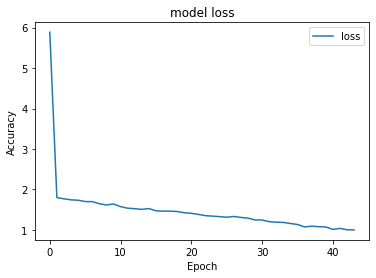

In [ ]:

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['loss'])
plt.show()

Plot the training accuracy over time using Matplotlib.

In [ ]:
plt.plot(history.history['accuracy'],'r')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy'])
plt.show()